# Saturation Calculation

### Import necessary libraries

In [7]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from skimage import data, io, color, img_as_ubyte

### Load Image Stack

In [8]:
# The first 120 slices of the original 1404x645x645 stack was removed, then scaled down to 160x315x315
image = img_as_ubyte(io.imread('0d_seg_grain_water_z160.tif'))
# image properties
print('Geometry of image (z,x,y,a) is', image.shape)
print('Image intensity range is from',image.min(),'to',image.max())
# n+1th slice of image[n]
image[15]

Geometry of image (z,x,y,a) is (160, 645, 645)
Image intensity range is from 0 to 255


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

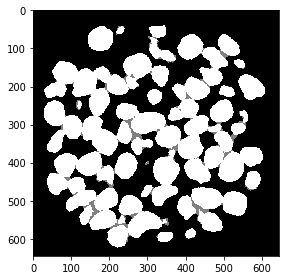

In [9]:
io.imshow(image[40,:,:])

### Create Subvolume

Geometry of image (z,x,y) is (500, 500)
Image intensity range is from 0 to 255


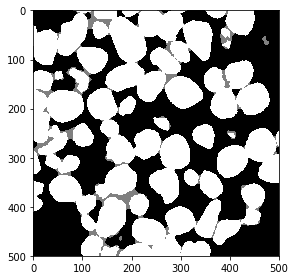

In [13]:
subvolume = image[50,100:600,100:600]
print('Geometry of image (z,x,y) is', subvolume.shape)
print('Image intensity range is from',subvolume.min(),'to',subvolume.max())
io.imshow(subvolume)

### Calculate Saturation for Volume

In [14]:
gas = (subvolume == 0).sum() # black
brine = ((subvolume > 0) & (subvolume < 255)).sum() # light gray
grain = (subvolume == 255).sum() # white
total = gas + brine + grain
pore = total - grain

phi = pore/total
Sg = gas/pore
Sw = brine/pore 
Ss = grain/pore

print('Porosity =',np.round(phi,decimals=4))
print('Gas Saturation =',np.round(Sg,decimals=4))
print('Water Saturation =',np.round(Sw,decimals=4))

Porosity = 0.464
Gas Saturation = 0.9275
Water Saturation = 0.0725


### Calculate Saturation Profile

In [15]:
L = len(image) # number of slices 
phi_profile = np.zeros(L) # create dummy array
Sg_profile = np.zeros(L) # create dummy array
Sw_profile = np.zeros(L) # create dummy array
Ss_profile = np.zeros(L) # create dummy array

for Z in range(0,L): 
    sliceZ = image[Z,100:600,100:600]
    gas = (sliceZ == 0).sum() # black
    brine = ((sliceZ > 0) & (sliceZ < 255)).sum() # darkgray
    grain = (sliceZ == 255).sum() # lightgray
    total = gas + brine + grain
    pore = total - grain
    phi_profile[Z] = pore/total
    Sg_profile[Z] = gas/pore
    Sw_profile[Z] = brine/pore 
    Ss_profile[Z] = grain/pore

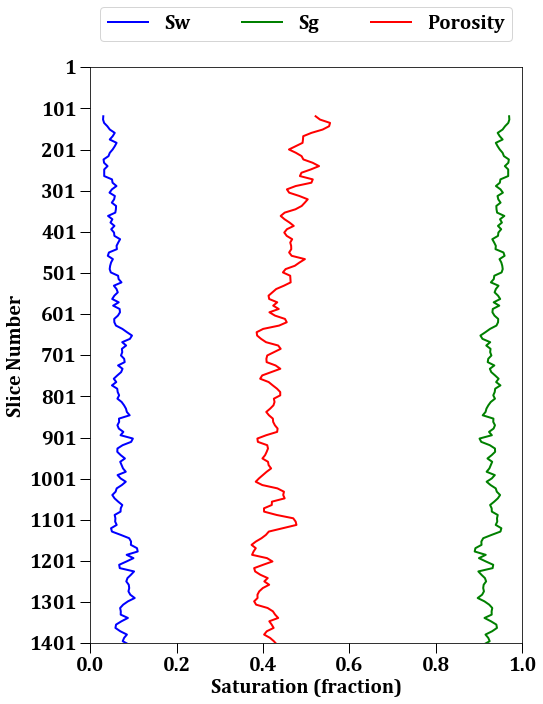

In [16]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Cambria'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1

depth = np.linspace(120,1404,L) 

plt.subplot(111)
plt.plot(Sw_profile,depth,'b-', linewidth=2, markersize=6,label="Sw")
plt.plot(Sg_profile,depth,'g-', linewidth=2, markersize=6,label="Sg")
plt.plot(phi_profile,depth,'r-', linewidth=2, markersize=6,label="Porosity")
plt.xlabel('Saturation (fraction)')
plt.ylabel('Slice Number')
plt_xmin=0
plt_xmax=1
plt.xlim([plt_xmin,plt_xmax])
plt.xticks(np.arange(plt_xmin,plt_xmax+0.01,0.2))
plt_ymin=1
plt_ymax=1400
plt.ylim([plt_ymax,plt_ymin])
plt.yticks(np.arange(plt_ymin,plt_ymax+10,100))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=4, mode="expand")
#plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=2, wspace=0.6, hspace=0.3)
plt.savefig('0d_seg_grain_water_z160_saturationprofile.png',dpi=600,bbox_inches="tight")
plt.show() 

In [17]:
print('Average Porosity =',np.round(np.average(phi_profile),decimals=4))
print('Average Water Saturation =',np.round(np.average(Sw_profile),decimals=4))
print('Average Gas Saturation =',np.round(np.average(Sg_profile),decimals=4))

Average Porosity = 0.4369
Average Water Saturation = 0.0658
Average Gas Saturation = 0.9342


In [18]:
data = {'Porosity':phi_profile, 'Water Saturation':Sw_profile, 'Gas Saturation':Sg_profile} 
df = pd.DataFrame(data) 
df.to_csv("0d_seg_grain_water_z160.csv")     
df.describe().to_csv("0d_seg_grain_water_z160_summary.csv")   
df.describe()

Porosity  Water Saturation  Gas Saturation
count  160.000000        160.000000      160.000000
mean     0.436866          0.065812        0.934188
std      0.039790          0.017142        0.017142
min      0.373460          0.029752        0.890043
25%      0.408465          0.055059        0.924552
50%      0.427656          0.064522        0.935478
75%      0.463001          0.075448        0.944941
max      0.555220          0.109957        0.970248